<a href="https://colab.research.google.com/github/pi-mishra/Quantium_DataAnalytics/blob/main/Quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#importing packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

import warnings
warnings = "ignore"

In [84]:
#reading the dataset

purchase = pd.read_csv('/content/drive/MyDrive/Quantium/QVI_purchase_behaviour.csv')
transaction = pd.read_excel('/content/drive/MyDrive/Quantium/QVI_transaction_data.xlsx')

# Cleaning data

In [85]:
#first view of purchase

purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [86]:
#first view of transaction

transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [87]:
#getting the datatypes

purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [88]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [89]:
"""all features are in correct format excluding date, we need to convert it into datetime"""

transaction['DATE']=pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction['DATE'], unit='D')

In [90]:
#checking for null values

purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [91]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [92]:
#checking for duplicates

purchase.duplicated().sum()

0

In [93]:
transaction.duplicated().sum()

1

In [94]:
#checking the duplicate rows

duplicates = transaction[transaction.duplicated(keep=False)]
duplicates

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [95]:
""" as per the above observation we have transaction that is registered 2 times we need to drop the duplicate"""

transaction.drop_duplicates(inplace= True)

# Feature engineering

In [96]:
#getting the unique count for each columns in purchase df

for i in purchase:
  unique_count_p = purchase[i].nunique()
  print(f"{i} = {unique_count_p}")

LYLTY_CARD_NBR = 72637
LIFESTAGE = 7
PREMIUM_CUSTOMER = 3


In [97]:
selected_columns_purchase = ['LIFESTAGE', 'PREMIUM_CUSTOMER']

# Iterate through selected columns and get unique values
for col_name in selected_columns_purchase:
    unique_values = purchase[col_name].unique()
    print(f"Unique values in column {col_name}: {unique_values}")

Unique values in column LIFESTAGE: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
Unique values in column PREMIUM_CUSTOMER: ['Premium' 'Mainstream' 'Budget']


In [98]:
#getting the unique count for each columns in transaction df

for i in transaction:
  unique_count_t = transaction[i].nunique()
  print(f"{i} = {unique_count_t}")

DATE = 364
STORE_NBR = 272
LYLTY_CARD_NBR = 72637
TXN_ID = 263127
PROD_NBR = 114
PROD_NAME = 114
PROD_QTY = 6
TOT_SALES = 112


In [99]:
selected_columns_transaction = ['STORE_NBR','PROD_NAME']

# Iterate through selected columns and get unique values
for col_name in selected_columns_transaction:
    unique_values = transaction[col_name].unique()
    print(f"Unique values in column {col_name}: {unique_values}")

Unique values in column STORE_NBR: [  1   2   4   5   7   8   9  13  19  20  22  23  25  33  36  38  39  41
  43  45  51  54  55  56  58  59  60  62  63  67  71  72  74  75  80  81
  82  83  84  88  94  96  97 101 102 104 106 109 110 111 112 114 115 116
 118 119 120 122 125 128 129 130 133 149 151 152 153 156 157 160 161 164
 166 167 168 169 172 173 175 178 181 184 186 187 191 194 196 197 200 205
 207 208 209 212 214 215 216 217 219 222 223 225 226 227 235 236 237 241
 243 246 247 248 250 253 255 256 257 262 265 266 269 271  77   3   6  10
  12  15  16  17  18  21  24  26  27  28  29  30  32  34  35  37  40  46
  47  48  49  50  52  53  57  61  64  65  66  68  69  70  73  78  79  86
  87  89  90  91  93  95  98 100 103 105 107 108 113 117 121 123 124 126
 127 131 132 134 135 136 137 138 140 141 142 143 144 145 147 148 150 154
 155 158 162 163 165 170 171 174 176 177 179 180 182 183 185 188 189 190
 192 195 199 201 202 203 210 213 218 220 221 224 228 229 230 231 232 233
 234 238 239 240

In [100]:
#extracting weight from prod_name column

transaction['product_weight'] = transaction['PROD_NAME'].str.extract(r'(\d+)[gG]')[0]

In [101]:
# Convert the 'product_weight' column to integers

transaction['product_weight'] = transaction['product_weight'].astype(int)

In [102]:
#removing weights from prod_weight column

transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace(r'\d+[gG]', '')

<ipython-input-102-5d05d1d36fa7>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [103]:
df = pd.merge(purchase, transaction, on='LYLTY_CARD_NBR', how='inner')

In [104]:
# Remove extra spaces between words in the 'PROD_NAME' column
df['PROD_NAME'] = df['PROD_NAME'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Analysis

In [105]:
df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum().sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    750744.50
Budget        676211.55
Premium       507452.95
Name: TOT_SALES, dtype: float64

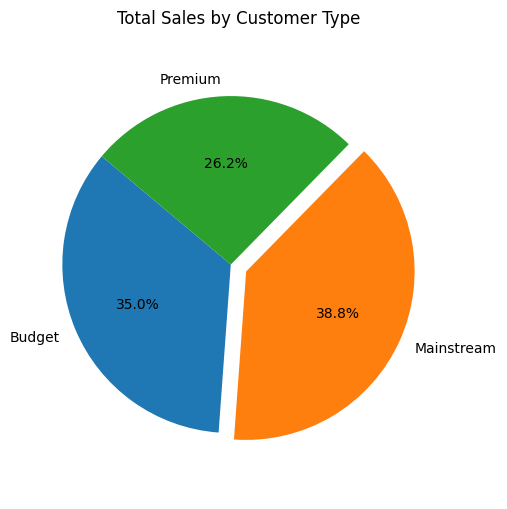

In [106]:
sales_by_customer = df.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].sum()

# Find the customer type with the maximum sales
max_sales_customer = sales_by_customer.idxmax()
explode = [0.1 if customer == max_sales_customer else 0 for customer in sales_by_customer.index]

# Create a pie chart
plt.figure(figsize=(5, 6))  # Adjust the figure size
plt.pie(sales_by_customer, labels=sales_by_customer.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Total Sales by Customer Type", pad=10)  # Increase the 'pad' to move the title further from the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [107]:
df.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].sum().sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    193965
Budget        177898
Premium       133259
Name: PROD_QTY, dtype: int64

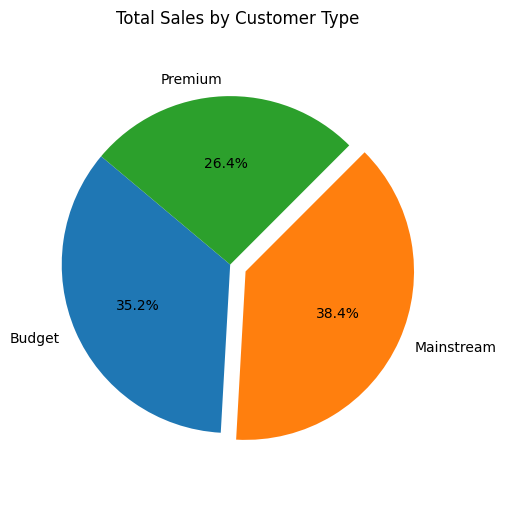

In [108]:
Quantity_by_customer = df.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].sum()

# Find the customer type with the maximum sales
max_Quantity_by_customer = Quantity_by_customer.idxmax()
explode = [0.1 if customer == max_sales_customer else 0 for customer in Quantity_by_customer.index]

# Create a pie chart
plt.figure(figsize=(5, 6))  # Adjust the figure size
plt.pie(Quantity_by_customer, labels=Quantity_by_customer.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Total Sales by Customer Type", pad=10)  # Increase the 'pad' to move the title further from the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [109]:
#average product ordered by each customer category

df.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].mean().sort_values(ascending=False)

PREMIUM_CUSTOMER
Premium       1.912168
Budget        1.909658
Mainstream    1.901841
Name: PROD_QTY, dtype: float64

In [112]:
# Filter the DataFrame for rows where 'PROD_QTY' is greater than 1
filtered_df = df[df['PROD_QTY'] > 1]

# Count the occurrences of each unique value in the 'PREMIUM_CUSTOMER' column
order_above_1 = filtered_df['PREMIUM_CUSTOMER'].value_counts()

print(order_above_1)

Mainstream    91033
Budget        83819
Premium       62465
Name: PREMIUM_CUSTOMER, dtype: int64


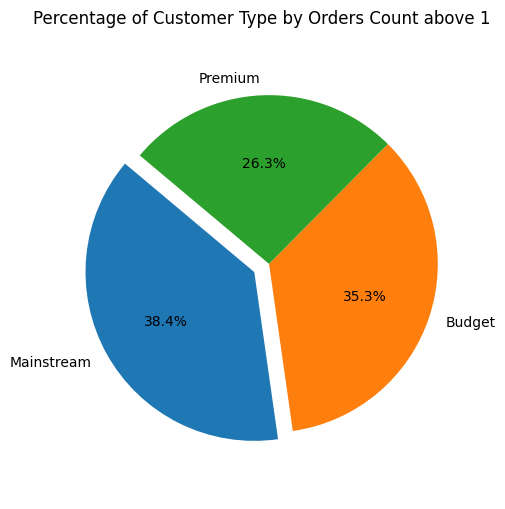

In [114]:
# Find the customer type with the maximum sales
max_order_above_1 = order_above_1.idxmax()
explode = [0.1 if customer == max_sales_customer else 0 for customer in order_above_1.index]

# Create a pie chart
plt.figure(figsize=(5, 6))  # Adjust the figure size
plt.pie(order_above_1, labels=order_above_1.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title("Percentage of Customer Type by Orders Count above 1", pad=10)  # Increase the 'pad' to move the title further from the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [80]:
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,product_weight
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli,1,2.7,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives,1,3.6,210
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn,1,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips,1,1.9,160
...,...,...,...,...,...,...,...,...,...,...,...
264830,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli,2,7.2,210
264831,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic,2,9.2,150
264832,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted,2,8.4,165
264833,2370961,OLDER FAMILIES,Budget,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht,2,10.2,300


In [ ]:
#plotting treemap to represent the distribution of customer

count_data = purchase.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].count().reset_index()

fig = px.treemap(count_data, path=['PREMIUM_CUSTOMER', 'LIFESTAGE'], values='LYLTY_CARD_NBR', color='LYLTY_CARD_NBR')

fig.show()

In [ ]:
#plotting treemap to get the distribution of customers with respect to sales

fig = px.treemap(df, path=['PREMIUM_CUSTOMER', 'LIFESTAGE'], values='TOT_SALES')

fig.show()

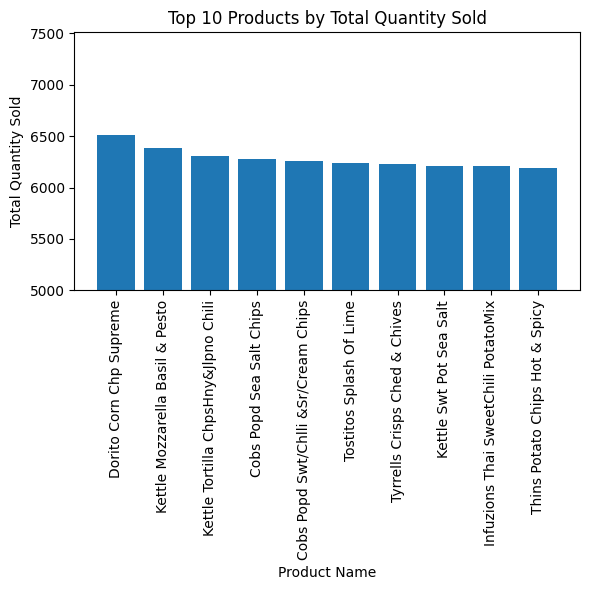

In [ ]:
# Group by 'PROD_NAME' and sum 'PROD_QTY'
product_sales = df.groupby('PROD_NAME')['PROD_QTY'].sum().reset_index().sort_values(by='PROD_QTY', ascending=False)[:10]

# Create a bar graph
plt.figure(figsize=(6, 6))
plt.bar(product_sales['PROD_NAME'], product_sales['PROD_QTY'])

# Set the y-axis limits to start from 5000
plt.ylim(5000, max(product_sales['PROD_QTY']) + 1000)

# Add labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Products by Total Quantity Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the graph
plt.tight_layout()
plt.show()


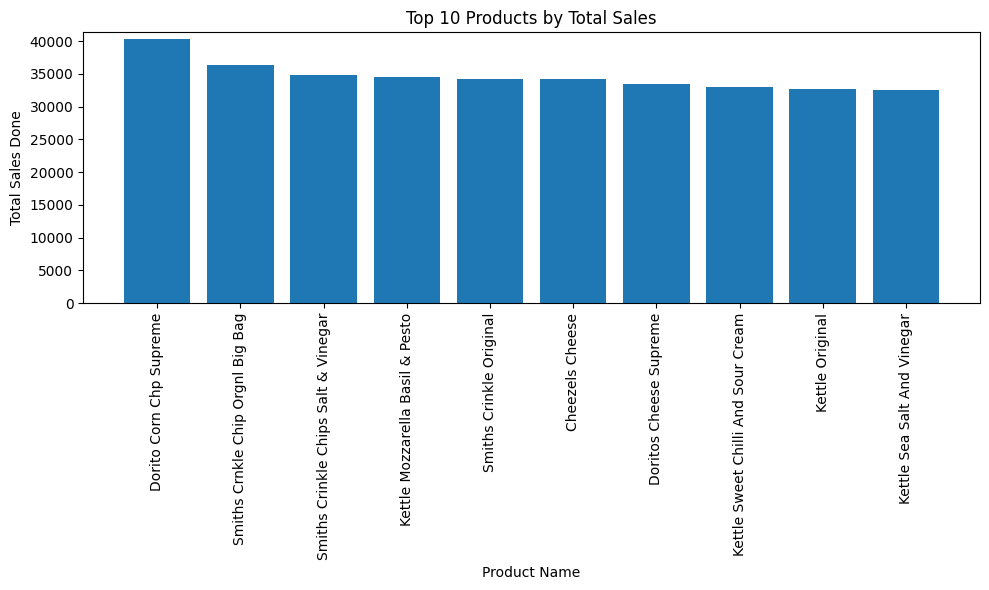

In [ ]:
# Group by 'PROD_NAME' and sum 'TOT_SALES'
product_sales_total = df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index().sort_values(by='TOT_SALES', ascending=False)[:10]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(product_sales_total['PROD_NAME'], product_sales_total['TOT_SALES'])

# Set the y-axis limits based on the maximum total sales
plt.ylim(0, max(product_sales_total['TOT_SALES']) + 1000)

# Add labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Sales Done')
plt.title('Top 10 Products by Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the graph
plt.tight_layout()
plt.show()
